# Den diskrete fouriertransformasjonen med anvendingar

## Innhaldsfortegning
* [Introduksjon](#first-bullet)
* [Eit ekte lydsignal](#4-bullet)
* [Den diskrete fouriertransformasjonen i python](#5-bullet)
* [Kor langt er DFT frå fouriertransformasjonen?](#3-bullet)
* [Invers diskrete fouriertransformasjonen med python](#6-bullet)
* [Syklisk konvolusjon i python](#7-bullet)
* [Høg- og lågpassfilter](#8-bullet)
* [Løysing på test deg sjølv](#9-bullet)

# Introduksjon <a class="anchor" id="first-bullet"></a>

I denne leksjonen skal vi lære korleis vi kan finne ei tilnærming til fouriertransformasjonen på datamaskinen. Dette gjer at vi kan finne og manipulere frekvensane til eit digitalt signal. Å kunne gjere dette raskt er eit av dei viktigaste framstega i moderne matematikk, og det finnes fleire anvendingar for dette. I dette notatet kjem vi til å ta føre oss eit av døma; nemleg _høg-_ og _lågpassfilter_. Desse filtra lar berre høge eller låge frekvensar "passere". Med andre ord eit høgpassfilter fjernar de låge frekvensane, mens eit lågpassfilter fjernar dei høge frekvensane.

For å gjere dette treng vi naturleg nok eit signal å jobbe med. I dette notatet kjem vi til å bruke to lydsignal frå ein gitar. Dei to lydsignala kjem frå å slå 
- den øvste E-strengen på gitaren og
- eit G-grep på gitaren.

Den første lydfila kjem naturleg nok til å innehalde ein E-tone med frekvens $82,41$Hz og andre E-tonar, mens eit G-grep inneheld fleire G-tonar (samt andre tonar) som har frekvens enten $98,00$Hz, $196,00$Hz and $392,00$Hz.

## Eit ekte lydsignal <a class="anchor" id="4-bullet"></a>
La oss laste inn døme vi snakka om i byrjinga av denne filen. For å handtere og plotte lydsignala, kjem vi til å måtte importere eit par pakkar. Dessutan er det nyttig å kunne høyre korleis det å manipulere frekvensane påverkar lydsignalet, dermed kjem vi til å importere ein konstruktor (ein funksjon som lagar eit klasseobjekt) som gjer at vi kan spele av signala.

In [1]:
import numpy as np # Pakke for å jobbe med vektorar i python
import matplotlib.pyplot as plt # Pakke for å lage grafar
from IPython.display import Audio # Konstruktor (eng. constructor) som vi kjem til å bruke for å spele av lydfilene

I mappa med dette jupyternotatet følger det også med to lydfiler:
- e_tone.npy
- g_chord.npy.

Endinga .npy refererar til at filene er numpy filer. La oss byrje med å laste inn desse filene.

In [2]:
# Laste inn lydfilene vi kjem til å bruke:
e_string = np.load("e_tone.npy")
g_chord = np.load("g_chord.npy")

La oss sjå litt nærmare på den første fila:

In [3]:
e_string

array([-0.00042982, -0.00041188, -0.00045654, ..., -0.00074165,
       -0.00077519,  0.        ], dtype=float32)

Som vi ser, er dette ein vektor. Om vi ønsker å tolke dette som eit lydsignal må vi oppgje kva enten prøvingsraten eller prøveavstanden er. For lydfiler er prøvingsraten vanlegvis enten $22'050$Hz eller $44'100$Hz. For lydfilene  `e_string` og `g_chord` er prøvingsraten på $22'050$Hz. La oss representere dette som ein variabel.

In [4]:
sampling_rate = 22050 # Prøvingsraten til lydfilene
sampling_period = 1/sampling_rate # Prøveavstanden i lydfilene

### Avspeling av lydsignala
Da har vi all informasjonen vi treng for å høyre på lydsignala.

In [5]:
# Den mørkaste E strengen på gitar. Trykk på play for å høyre lydsignalet
Audio(e_string, rate=sampling_rate)

In [6]:
# Eit G-grep på gitar. Trykk på play for å høyre lydsignalet
Audio(g_chord, rate=sampling_rate)

### Test deg sjølv 1
_Du finn løysinga på desse oppgåvene på slutten av notatet._

1) Om vi tek 30 punktprøver på $2$ sekund. Kva er da prøvingsraten og prøveavstanden?
2) I kodecellen under, adder lydfilene `e_string` og `g_chord`. Spel av den summen av fillene. Kva skjer? 
    _Hugs at for å addere vektorane må begge vektorane ha same lengd._
3) Spel av lydfila `e_string` med prøvingsrate på $44'100$Hz. Korleis samanliknar den nye avspelinga med den originale?

In [7]:
#### 2)
# Adder e_string og g_chord

# Legg til kode for å spele av lydfila prøvingsrate på $44'100$Hz


In [8]:
#### 3)
# Spel av lydfila med 


### Plotting av lydsignala
Det vi ønsker å gjere nå er å plotte grafen til lydsignala, det vil sei, kor kva er lufttrykket i tida $t$. Om vi ønsker å bruke `matplotlib` treng vi da ein vektor for verdiane langs $x$-aksen, eller tida, kor vi tek punktprøvene. Når vi spelar av lyd, er det vanleg å byrje på $0$s, for deretter å gå framover til lengda til lydsignalet $L$. For å lage vektorane med tidspunkta prøvene er tatt på kan vi først finne ut i kor mange sekund lydfila varer, for å detteter dele inn intervallet i like mange deler som vi har punktprøver. Om vi gjer dette for kvart av lydsignala ender vi opp med følgande kode:

In [9]:
# Tidspunktet prøvene er tatt på for lydfila e_string
number_of_samples_e = e_string.size # Kor mange prøver signalet består av
e_string_duration = number_of_samples_e / sampling_rate # Tida lydsignalet varer

e_sample_times = np.linspace(0, e_string_duration,  number_of_samples_e) # Tidspunktet prøvene er tatt på frå null

Nå kan vi endeleg bruke matplotlib til å plotte lydsignala.

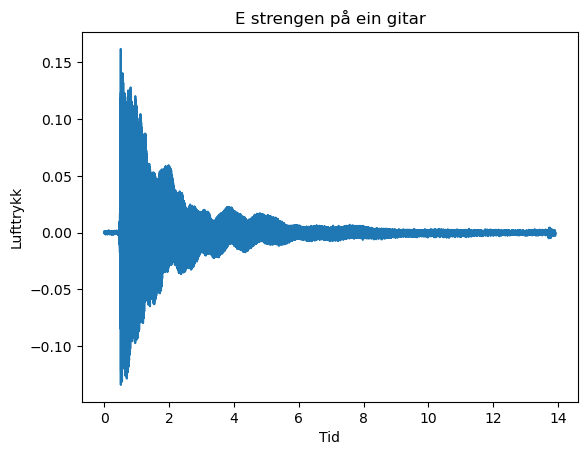

In [10]:
# Plot av lydfila som inneheld e-strengen
plt.plot(e_sample_times, e_string)
plt.title("E strengen på ein gitar")
plt.xlabel("Tid")
plt.ylabel("Lufttrykk")

plt.show()

Som vi ser frå bilete er det nokså stille dei første ca. 0.3 sekunda. Så slår gitaristen på strengen noko som gjer at lufttrykket får større variasjon. Deretter blir det gradvis stillare. Om du ønsker kan du spele av lydfila igjen og samanlikne det du høyrer og ser i grafen.

Vi kan gjere akkurat det same for lydfila som inneheld G-grepet på gitaren.

In [11]:
# Tidspunktet prøvene er tatt på for lydfila g_chord
number_of_samples_g = g_chord.size # Kor mange prøver signalet består av
g_chord_duration = number_of_samples_g / sampling_rate # Tida lydsignalet varer

g_sample_times = np.linspace(0, g_chord_duration,  number_of_samples_g) # Tidspunktet prøvene er tatt på frå null

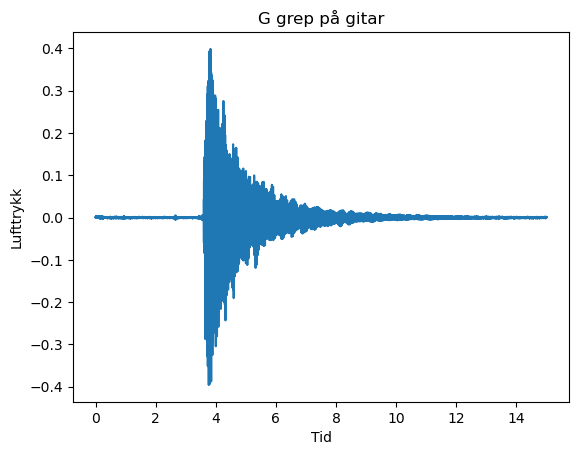

In [12]:
# Plot av lydfila som inneheld G-grepet
plt.plot(g_sample_times, g_chord)
plt.title("G grep på gitar")
plt.xlabel("Tid")
plt.ylabel("Lufttrykk")

plt.show()

### Test deg sjølv 2
Ta for deg følgande lydsignal.

In [13]:
frequency = 300 # Frekvensen til signalet målt i svingingar per sekund (Hz)

length_time = 5 # Lengda til signalet i tid.
t = np.linspace(0, 3, sampling_rate * length_time, endpoint=False) # Tidsverdiane vi tar punktprøver på

# Ein rein tone med frekvens på 300Hz
pure_tone = 0.5 * np.sin(2 * np.pi * frequency * t)

1) Plott signalet over på intervallet frå 0 til 0.1.
2) Spel av lydfila. Reine tonar skal høyrast ut som høyrselstest vi tar hos legen.

(0.0, 0.1)

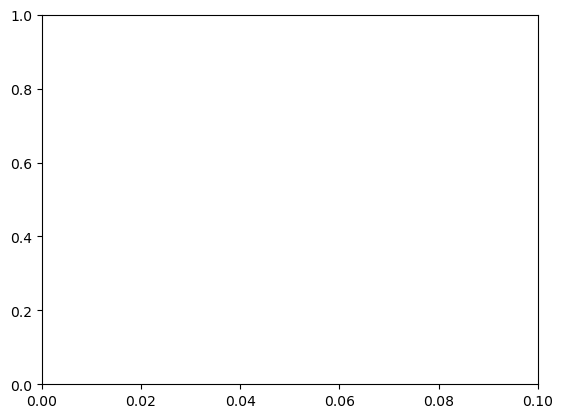

In [14]:
### 1)
# Plott signalet over på intervallet.


plt.xlim(0, 0.1) # Avgrens plottet til verdiar mellom 0 og 0.1

In [15]:
### 2)
# Spel av lydfila.


## Den diskrete fouriertransformasjonen i python <a class="anchor" id="5-bullet"></a>

Om vi har mange punktprøver kan det ta lang tid å finne den diskrete fouriertransformasjonen for hand. Da er det bra at vi kan gjere det i python. For å bruke den må vi importere den fft modulen frå numpy.

In [16]:
# Last inn fft modulen
from numpy import fft

For å finne den diskrete fouriertransformasjonen kan vi nå bruke funksjonen `fft.fft`.

In [17]:
# Diskrete fouriertransformasjonen av e_string
dft_e_string = fft.fft(e_string)
dft_e_string

array([-4.46177067-4.02455846e-16j,  0.15669822-5.04057352e-02j,
        0.27023926-3.80967216e-01j, ...,  0.21311485-4.79677370e-01j,
        0.27023926+3.80967216e-01j,  0.15669822+5.04057352e-02j])

For å finne frekvensane må vi skalere tidsaksen riktig med omsyn på prøvingsraten. Dette kan vi gjere med `fft.fftfreq`.

In [18]:
# Finn frekvensane til e_string
e_freq_sample = fft.fftfreq(e_string.size, sampling_period)
e_freq_sample

array([ 0.        ,  0.07182738,  0.14365476, ..., -0.21548214,
       -0.14365476, -0.07182738])

Nå kan vi plotte frekvensane, slik at vi kan sjå kva for nokre tonar lydfila består av. For å gjere plottet lettare å lese, har vi valgt å kutte av plottet med $15'000$Hz. Dette er rett undar det eit meneske kan høyre, som er $20'000$Hz.

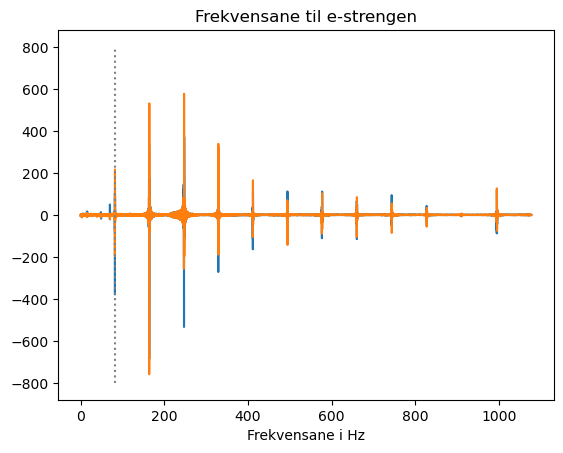

In [19]:
# Plott den reele delen av DFTen
plt.plot(e_freq_sample[:15000], dft_e_string.real[:15000])

# Plott den imaginære delen av DFTen
plt.plot(e_freq_sample[:15000], dft_e_string.imag[:15000])

# Marker grunntona E2 med ein grå stipla linje
plt.vlines(82.41, ymin=-800, ymax=800, colors='gray', linestyle='dotted')

plt.title("Frekvensane til e-strengen")
plt.xlabel("Frekvensane i Hz")
plt.show()

Som vi ser er det fleire spisser i plottet. Dette tilsvarar frekvensar med høg amplitude, eller med andre ord, dei frekvensane vi høyrer. Til dømes, er den første spissen frå høgre på $82.41$Hz som i musikkverdenen er kalla er grunntonen til strengen. Denne er markert med ein grå stipla linje. Dei høgare frekvensane er eit heiltalsmultiplum. Dette er ein konsekvens av at tidsutviklinga til ein gitarstreng løysar bølgelikninga som vi studerte tidligare.

### Spektogram

Vi kan også velge å plotte spektogrammet ved å ta absoluttverdien av DFT.

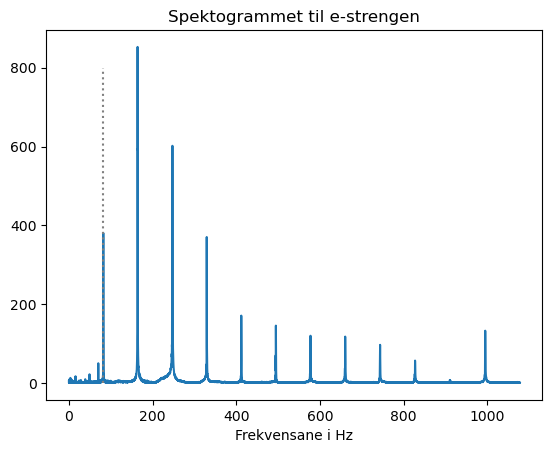

In [20]:
# Plott den reele delen av DFTen
plt.plot(e_freq_sample[:15000], np.abs(dft_e_string[:15000]))

# Marker grunntona E2 med ein grå stipla linje
plt.vlines(82.41, ymin=-0, ymax=800, colors='gray', linestyle='dotted')

plt.title("Spektogrammet til e-strengen")
plt.xlabel("Frekvensane i Hz")
plt.show()

### Test deg sjølv 3

Plot frekvensane til lydfila `g_chord`.

## Kor langt er DFT frå fouriertransformasjonen? <a class="anchor" id="3-bullet"></a>
Målet med DFT er å approksimere fouriertransformasjonen i dei tilfella vi tek punktprøver. Det er fleire måter ein kan lage ein samanlikning alt etter kor vi tek punktprøvar. Grunna naturen til DFT er dette lettast å gjere når signalet er null før $t=0$. Viss dette ikkje er tillfellet må vi gjer eit frekvensskift.

### Funksjonen $f(t)=\exp(-2t)u(t)$

Sida $f(t)$ er $0$ for $t<0$ og går raskt mot null når $t$ er stor, har vi at
$$\mathcal{F}\{f(t)\}(\omega)=\int_{-\infty}^\infty f(t)e^{-j\omega t}\,\mathrm{d}t=\int_{0}^\infty f(t)e^{-j\omega t}\,\mathrm{d}t\approx \int_{0}^{1} f(t)e^{-j\omega t}\,\mathrm{d}t.$$
Bruker vi riemannsummer får vi at
$$\mathcal{F}\{f(t)\}(\omega)\approx\frac{1}{N}\sum_{n=0}^{N-1}f\left(\frac{n}{N-1}\right)e^{-j\omega (\frac{n}{N-1})},$$
kor $N$ er antal punktprøver.
Setter vi inn frekvensane $\omega=2\pi k$ får vi samanlikninga
$$\mathcal{F}\{f(t)\}(2\pi k)\approx \frac{1}{N}\sum_{n=0}^{N-1}f\left(\frac{n}{N-1}\right)e^{-2\pi jk \frac{n}{N-1}}=\frac{1}{N}\mathcal{D}(\vec{v})(k),$$
kor $\vec{v}[n]=f\left(\frac{n}{N-1}\right)$.

Som vi veit, er fouriertransformasjonen av $f$ gitt som

$$\mathcal{F}\{f(t)\}(\omega)=\frac{1}{2+j\omega}.$$

La oss sjå korleis dette samanliknar med DFT om prøvingsraten er $N=400$ per tid på intervallet $[0,1]$. Som vi ser må vi dele DFT med $N$ for å få ein rettferdig samanlikning.

In [21]:
sampling_rate_comparison = 400

# x verdiene til signalet
t = np.linspace(0, 1, sampling_rate_comparison)

# Signalet
f = np.exp(- 2*t)

# DFT av signalet
f_dft = fft.fft(f)

# shift plottet slik at det korosponderer til frekvensane
freq_sample = fft.fftfreq(f.size, 1/sampling_rate_comparison)

# Normaliser med omsyn på sampling_rate_comparison
f_dft_normalized = f_dft / sampling_rate_comparison

# Fouriertransformasjonen av signalet
F = 1/(2 + 2*np.pi*1j*freq_sample) # Legg merkje med at vi multipliserer med 2*np.pi foran freq_sample

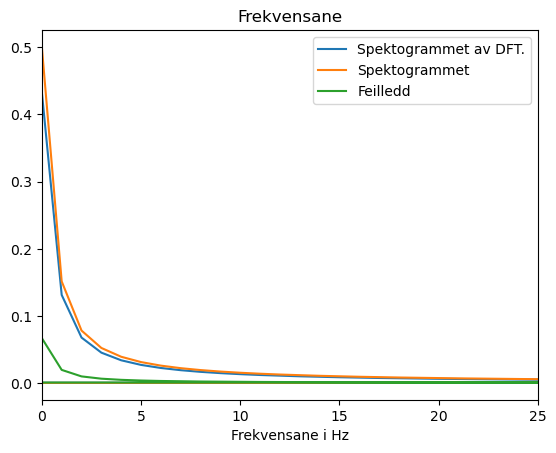

In [22]:
### Feil i spektogrammet

# Plott feilleddet til den diskrete fouriertransformasjonen
plt.plot(freq_sample, np.abs(f_dft_normalized))
plt.plot(freq_sample, np.abs(F))
plt.plot(freq_sample, np.abs(f_dft_normalized-F))


plt.legend(["Spektogrammet av DFT.", 'Spektogrammet', 'Feilledd'])

plt.xlim(0, 25) # Tek eit utsnitt for å sjå frekvensane i spektogrammet betre

plt.title("Frekvensane")
plt.xlabel("Frekvensane i Hz")
plt.show()

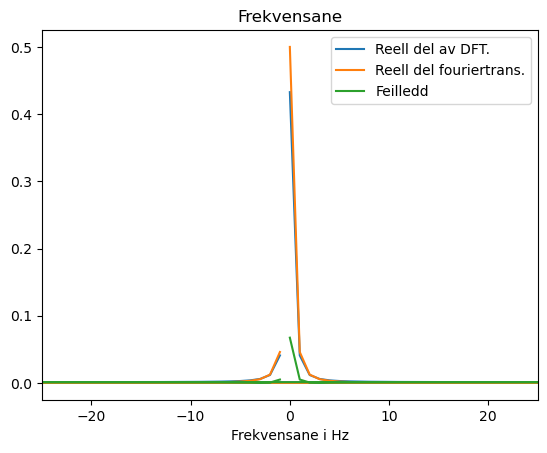

In [23]:
### Feil i den reelle delen

# Plott den reele delen av den diskrete fouriertransformasjonen
plt.plot(freq_sample, f_dft_normalized.real)
plt.plot(freq_sample, F.real)
plt.plot(freq_sample, np.abs(f_dft_normalized.real-F.real))

plt.legend(["Reell del av DFT.", 'Reell del fouriertrans.', 'Feilledd'])
plt.xlim(-25, 25) # Tek eit utsnitt for å sjå frekvensane i spektogrammet betre


plt.title("Frekvensane")
plt.xlabel("Frekvensane i Hz")
plt.show()

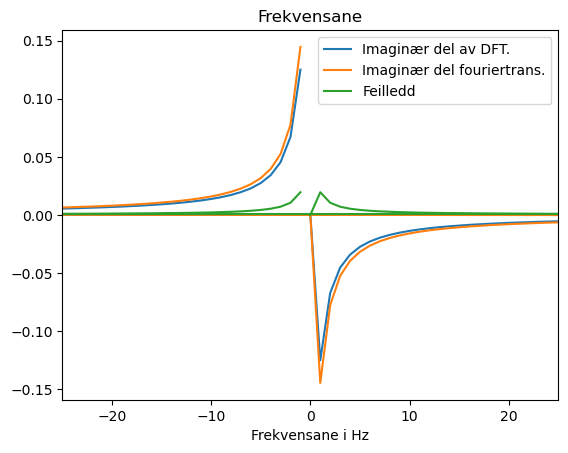

In [24]:
### Feil i den imaginære delen

# Plott den imaginære delen av den diskrete fouriertransformasjonen
plt.plot(freq_sample, f_dft_normalized.imag)
plt.plot(freq_sample, F.imag)
plt.plot(freq_sample, np.abs(f_dft_normalized.imag-F.imag))

plt.legend(["Imaginær del av DFT.", 'Imaginær del fouriertrans.', 'Feilledd'])
plt.xlim(-25, 25) # Tek eit utsnitt for å sjå frekvensane i spektogrammet betre


plt.title("Frekvensane")
plt.xlabel("Frekvensane i Hz")
plt.show()

Som vi kan sjå frå grafene, er feilledda svært små.

### Gaussiske funksjon
La oss sjå kor bra DFT gjer det på signalet 
$$g(t)=\exp(-16t^2).$$
Sida $g(t)$ går raskt mot null når $t$ er stor i absoluttverdi, har vi at
$$\mathcal{F}\{g(t)\}(\omega)=\int_{-\infty}^\infty g(t)e^{-j\omega t}\,\mathrm{d}t\approx \int_{-1/2}^{1/2} g(t)e^{-j\omega t}\,\mathrm{d}t\approx\frac{1}{N}\sum_{n=0}^{N-1}g\left(-1/2 + \frac{n}{N-1}\right)e^{-j\omega (-1/2 + \frac{n}{N-1})},$$
kor $N$ er antal punktprøver.
Setter vi inn frekvensane $\omega=2\pi k$ får vi samanlikninga
$$\mathcal{F}\{g(t)\}(2\pi k)\approx \frac{1}{N}\sum_{n=0}^{N-1}g\left(-1/2 + \frac{n}{N-1}\right)e^{\pi j k}e^{-2\pi jk \frac{n}{N-1}}=e^{\pi j k}\frac{1}{N}\mathcal{D}(\vec{v})(k),$$
kor $\vec{v}[n]=g\left(-1/2 + \frac{n}{N-1}\right)$.
Grunnen til faktoren $e^{\pi j k}$ er at vi må gjere tidsskift for å flytte signalet slik at det startar i null. Husk at faktoren $e^{\pi j k}$ ikkje påverkar amplituda, sida $|e^{\pi j k}|=1$.

Som vi veit, er fouriertransformasjonen av $f$ gitt som

$$\mathcal{F}\{g(t)\}(\omega)=\sqrt{\frac{\pi}{16}}\exp(-\omega^2/64).$$

La oss sjå korleis dette samanliknar med DFT om prøvingsraten er $N=200$ per tid på intervallet $[-1/2,1/2]$.

In [25]:
sampling_rate_comparison = 200

# t verdiene til signalet
t = np.linspace(-1/2, 1/2, sampling_rate_comparison)

# Signalet
g = np.exp(- 16*t**2)

# DFT av signalet
g_dft = fft.fft(g)

# shift plottet slik at det korosponderer til frekvensane
freq_sample = fft.fftfreq(g.size, 1/sampling_rate_comparison)

# Normaliser og gjere eit tidsskift med omsyn på sampling_rate_comparison
g_dft_normalized = np.exp(np.pi*1j*freq_sample) * g_dft / sampling_rate_comparison

# Fouriertransformasjonen av signalet
G = np.sqrt(np.pi/16) * np.exp(- (2*np.pi*freq_sample)**2/64) # Legg merkje med at vi multipliserer med 2*np.pi foran freq_sample

La oss plotte den absoluttverdien til fouriertransformasjonen og DFT. Som vi ser, er ikke feilen så stor mellom.

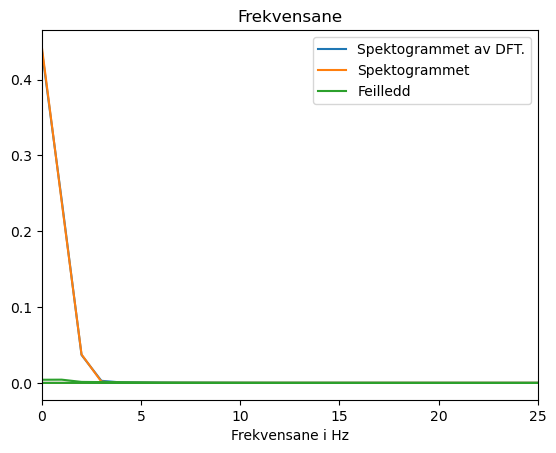

In [26]:
### Feil i spektogrammet

# Plott feilleddet til den diskrete fouriertransformasjonen
plt.plot(freq_sample, np.abs(g_dft_normalized))
plt.plot(freq_sample, np.abs(G))
plt.plot(freq_sample, np.abs(g_dft_normalized-G))


plt.legend(["Spektogrammet av DFT.", 'Spektogrammet', 'Feilledd'])

plt.xlim(0, 25) # Tek eit utsnitt for å sjå frekvensane i spektogrammet betre

plt.title("Frekvensane")
plt.xlabel("Frekvensane i Hz")
plt.show()

Som vi ser frå grafen er feilleddet neglisjerbart, og er svært nærme $0$.

## Invers diskrete fouriertransformasjonen med python <a class="anchor" id="6-bullet"></a>

Som med DFT har også IDFT ein eigen pythonfunksjon. Denne ligg også i `fft` modulen i numpy og heitar `fft.ifft`.

In [27]:
v = np.array([1, 2, 3, 4])

# Invers diskrete fouriertransformasjonen
v_idft = fft.ifft(v)
v_idft

array([ 2.5+0.j , -0.5-0.5j, -0.5+0.j , -0.5+0.5j])

For å gå tilbake til den orginale vektoren kan vi bruke  `fft.fft` funksjonen igjen.

In [28]:
v_idft_dft = fft.fft(v_idft)
v_idft_dft

array([1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j])

Du lurar kanskje på kvifor modulen heitar fft og ikkje dft? Grunnen er at fft står for "fast fourier transform". Dette viser til algoritmen som blir brukt er, som namnet tilseier, ein mykje raskare algoritme for å berekne den diskrete fouriertransformasjonen enn den vi lærar i kurset.

## Syklisk konvolusjon i python <a class="anchor" id="7-bullet"></a>

In [29]:
# Importer konvolusjonen
from scipy.ndimage import convolve

v = np.array([1, 2, 3])
w = np.array([1, 0, 2])

# Syklisk konvolusjon med python
convolve(v, w, mode='wrap')

array([8, 5, 5])

## Høg- og lågpassfilter  <a class="anchor" id="8-bullet"></a>
Ein vanleg måte å manipulere eit lydsignal er å bruke eit filter. For oss kjem eit filter til å vere å først å bruke DFT, deretter manipulere frekvensane, for å til slutt å gå tilbake med IDFT. Dette er vist i figuren under:
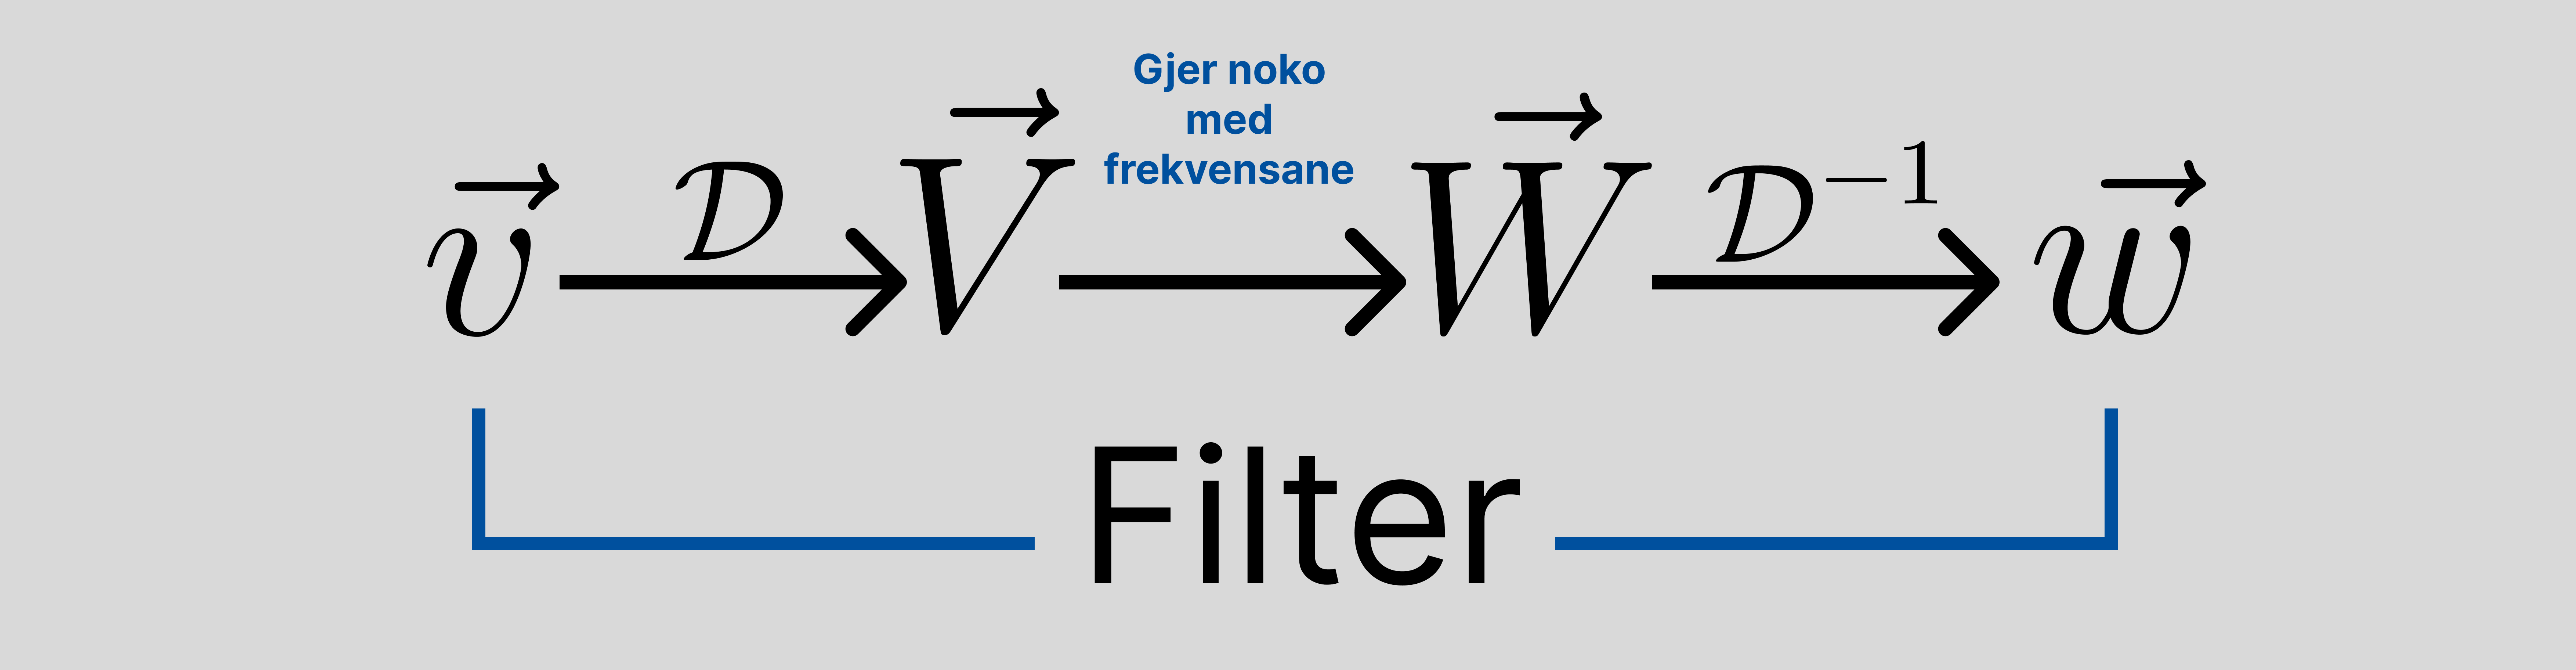
Kva for ein type filter det er heng saman med kva vi gjer med frekvensane. Filtera blir blant anna brukt til å fjerne støy, eller få meir bass i eit lydsignal. Videre kjem vi til å sjå på to døme på filter, nemleg høgpassfilter og lågpassfilter.


### Høgpassfilter
Eit høgpassfilter let berre dei høge frekvensane passere (i absoluttverdi). Dei låge frekvensane blir derimot enten satt til null (eller veldig nærme null). Kor vi kuttar av frekvensane er kalla avkuttingspunktet. Den lettaste måten å lage eit høgpassfilter er å sette alle frekvensane under avkuttingspunktet lik null. Det vil sei at om avkuttingspunktet er $600$Hz, vil vi ikkje gjere noko med frekvensane over $600$Hz, mens dei under vil bli satt til $0$. La oss gjer eit døme i python med `e_string`.

In [30]:
# Avspeling av det orginale signalet
Audio(e_string, rate=sampling_rate)

Om vi tar DFT får vi følgende resultat:

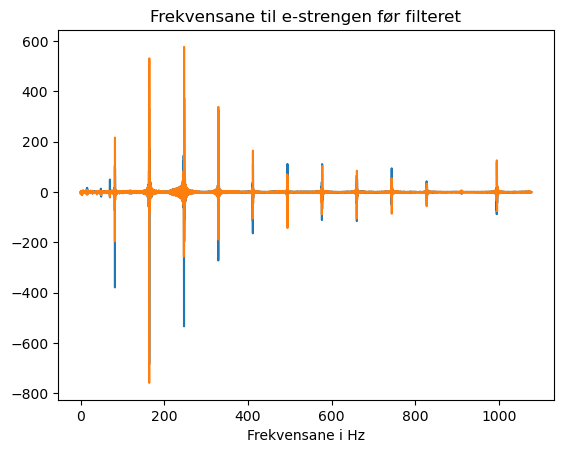

In [31]:
# DFT av signalet
dft_e = fft.fft(e_string)

# Frekvensane til signalet
dft_e_freq = fft.fftfreq(dft_e.size, 1/sampling_rate)

### Plot Frekvensane

# Plott den reele delen av den diskrete fouriertransformasjonen
plt.plot(e_freq_sample[:15000], dft_e.real[:15000])

# Plott den imaginære delen av den diskrete fouriertransformasjonen
plt.plot(e_freq_sample[:15000], dft_e.imag[:15000])

plt.title("Frekvensane til e-strengen før filteret")
plt.xlabel("Frekvensane i Hz")
plt.show()

La oss sette alle frekvensane som er mindre i absoluttverdi enn $600$Hz til å vere $0$.

Text(0.5, 0, 'Frekvensane i Hz')

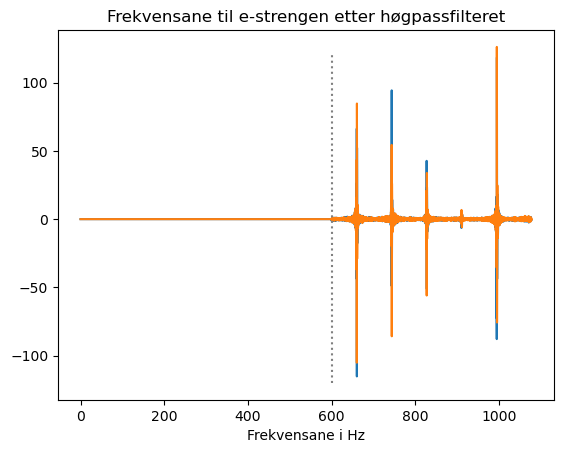

In [32]:
# Sett verdien i alle frekvensane under 600Hz til null
dft_e[np.abs(e_freq_sample) < 600] = 0

### Plot Frekvensane

# Plott den reele delen av den diskrete fouriertransformasjonen
plt.plot(e_freq_sample[:15000], dft_e.real[:15000])

# Plott den imaginære delen av den diskrete fouriertransformasjonen
plt.plot(e_freq_sample[:15000], dft_e.imag[:15000])

# Marker avkuttingsfrekvensen med ein grå stipla linje
plt.vlines(600, ymin=-120, ymax=120, colors='gray', linestyle='dotted')

plt.title("Frekvensane til e-strengen etter høgpassfilteret")
plt.xlabel("Frekvensane i Hz")

Det siste vi må gjorde er å gå tilbake med IDFT for å få en ny lydfil.

In [33]:
# Ta IDFT av det nye signalet
e_string_highpass = fft.ifft(dft_e)

# Avspeling av signalet etter filteret
Audio(e_string_highpass.real, rate=sampling_rate)

Om du samanlignar `e_string_highpass` med det orginale lydfilen hører vi at det berre er høge frekvensar i lydfilen, sidan alle dei låge frekvensane er null.

### Test deg sjølv 4
Bruk eit høgpassfilter med avkuttingsfrekvens på $500$Hz på lydfila `g_chord`.

In [34]:
# DFT av signalet
dft_g = fft.fft(g_chord)

# Frekvensane til signalet
dft_g_freq = fft.fftfreq(dft_g.size, 1/sampling_rate)

# Sett verdien i alle frekvensane under 500Hz (i absoluttverdi) til null


# Ta IDFT av det nye signalet


# Avspeling av signalet etter filteret


### Lågpassfilter
Lågpassfilter lar kun frekvensane under avkuttingsfrekvensen passere. La oss fjerne alle frekvensane over $800$Hz.

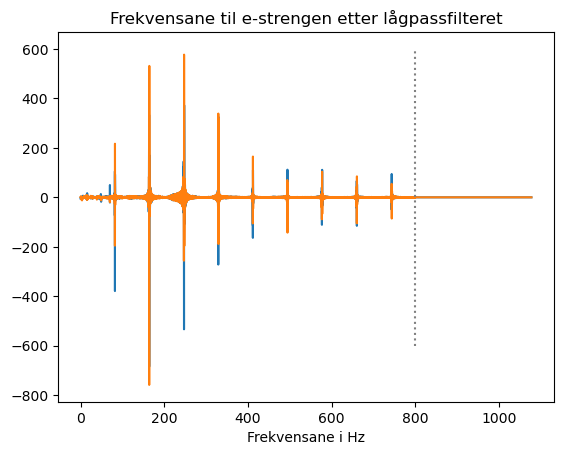

In [35]:
# DFT av signalet
dft_e = fft.fft(e_string)

# Sett verdien i alle frekvensane over 800Hz til null
dft_e[np.abs(e_freq_sample) > 800] = 0

### Plot Frekvensane

# Plott den reele delen av den diskrete fouriertransformasjonen
plt.plot(e_freq_sample[:15000], dft_e.real[:15000])

# Plott den imaginære delen av den diskrete fouriertransformasjoen
plt.plot(e_freq_sample[:15000], dft_e.imag[:15000])

# Marker avkuttingsfrekvensen med ein grå stipla linje
plt.vlines(800, ymin=-600, ymax=600, colors='gray', linestyle='dotted')

plt.title("Frekvensane til e-strengen etter lågpassfilteret")
plt.xlabel("Frekvensane i Hz")
plt.show()

Da gjenstår det berre å gå tilbake med IDFT.

In [36]:
# Ta IDFT av det nye signalet
e_string_lowpass = fft.ifft(dft_e)

# Avspeling av signalet etter filteret
Audio(e_string_lowpass.real, rate=sampling_rate)

### Test deg sjølv 5
Bruk eit høgpassfilter med avkuttingsfrekvens på $400$Hz på lydfila `g_chord`.

In [37]:
# DFT av signalet
dft_g = fft.fft(g_chord)

# Frekvensane til signalet
dft_g_freq = fft.fftfreq(dft_g.size, 1/sampling_rate)

# Sett verdien i alle frekvensane over 400Hz (i absoluttverdi) til null


# Ta idft av det nye signalet


# Avspeling av signalet etter filteret


## Løysing på test deg sjølv<a class="anchor" id="9-bullet"></a>

### Test deg sjølv 1
1) Prøvingsraten er $30/2=15$. Prøveavstanden er $\frac{1}{15}$.
2) I kodecellen under, adder lydfilene `e_string` og `g_chord`. Spel av den summen av fillene. Kva skjer? 

In [38]:
# Tar summen av lydfilene
sum_of_sounds = e_string + g_chord[0:e_string.size]

# Som vi høyrer, resulterer summen av filene at det høyres ut som at begge filene blir spilt av samtidig
Audio(sum_of_sounds, rate=sampling_rate)

3) Spel av lydfila `e_string` med prøvingsrate på $44'100$Hz. Korleis samanliknar den nye avspelinga med den orginale?

In [39]:
# Som vi høyrer blir tonane lysare. 
# Dette er grunna at alle frekvensane blir dobla når speler av lydfila med dobbel hastigheit
Audio(e_string, rate=44100)

### Test deg sjølv 2

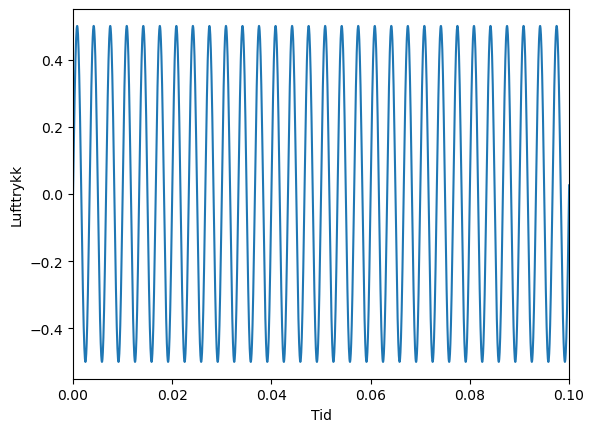

In [40]:
frequency = 300 # Frekvensen til signalet målt i svingingar per sekund (Hz)

length_time = 5 # Lengda til signalet i tid.
t = np.linspace(0, 3, sampling_rate * length_time, endpoint=False) # Tidsverdiane vi tar punktprøver på

# Ein rein tone med frekvens på 300Hz
pure_tone = 0.5 * np.sin(2 * np.pi * frequency * t)

### 1)
# Plott signalet over på intervallet.
plt.plot(t, pure_tone)
plt.xlabel("Tid")
plt.ylabel("Lufttrykk")
plt.xlim(0, 0.1)

plt.show()

In [41]:
### 2)
# Spel av lydfila.
Audio(pure_tone, rate=sampling_rate)

### Test deg sjølv 3

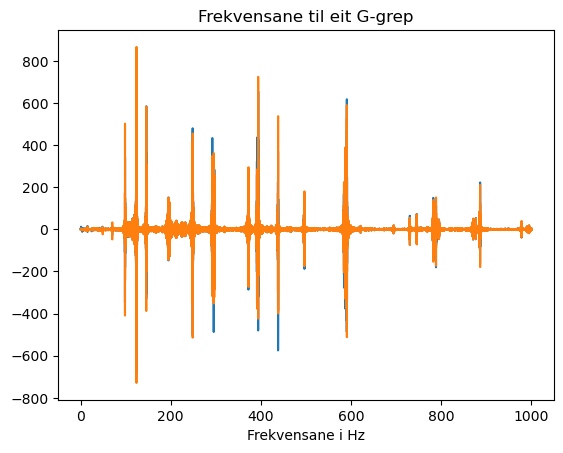

In [42]:
# Diskrete fouriertransformasjonen av g_chord
dft_g_chord = fft.fft(g_chord)

# Finn frekvensane til g_chord
g_freq_sample = fft.fftfreq(g_chord.size, 1/sampling_rate)

# Plott den reele delen av den diskrete fouriertransformasjonen
plt.plot(g_freq_sample[:15000], dft_g_chord.real[:15000])

# Plott den imaginære delen av den diskrete fouriertransformasjonen
plt.plot(g_freq_sample[:15000], dft_g_chord.imag[:15000])

plt.title("Frekvensane til eit G-grep")
plt.xlabel("Frekvensane i Hz")
plt.show()

### Test deg sjølv 4

In [43]:
# DFT av signalet
dft_g = fft.fft(g_chord)

# Frekvensane til signalet
dft_g_freq = fft.fftfreq(dft_g.size, 1/sampling_rate)

# Sett verdien i alle frekvensane under 500Hz (i absoluttverdi) til null
dft_g[np.abs(dft_g_freq) < 500] = 0

# Ta IDFT av det nye signalet
g_chord_highpass = fft.ifft(dft_g)

# Avspeling av signalet etter filteret
Audio(g_chord_highpass.real, rate=sampling_rate)

### Test deg sjølv 5

In [44]:
# DFT av signalet
dft_g = fft.fft(g_chord)

# Frekvensane til signalet
dft_g_freq = fft.fftfreq(dft_g.size, 1/sampling_rate)

# Sett verdien i alle frekvensane over (i absoluttverdi) 400Hz til null
dft_g[np.abs(dft_g_freq) > 400] = 0

# Ta IDFT av det nye signalet
g_chord_lowpass = fft.ifft(dft_g)

# Avspeling av signalet etter filteret
Audio(g_chord_lowpass.real, rate=sampling_rate)